# Лабораторная работа №3. Синтез БИХ-фильтров




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Модуль 2. Метод билинейного *z*-преобразования

Основа метода: билинейная подстановка 
$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$
в передаточную функцию $H(p)$ аналогового фильтра-прототипа.

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Привести графики АЧХ в линейном масштабе и в дБ. 

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [180]:
# Опредление набора параметров 
fs = 6800 # частота дискретизации 
f1 = 1040 # граничная частота полосы пропускания
f2 = 1380 # граничная частота полосы задерживания
gpass=0.4455 # максимальное допустимое затухание в полосе пропускания в дБ
gstop=26 # минимальное допустимое затухание в полосе задерживанияd в дБ
wp, ws = f1, f2

**Библиотечные функции синтеза** 

In [181]:
# Синтез на основе фильтра Баттервота
N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
beta, alpha 

Порядок фильтра  12
Частота среза 1124.40 Гц


(array([1.77036874e-05, 2.12444249e-04, 1.16844337e-03, 3.89481122e-03,
        8.76332525e-03, 1.40213204e-02, 1.63582071e-02, 1.40213204e-02,
        8.76332525e-03, 3.89481122e-03, 1.16844337e-03, 2.12444249e-04,
        1.77036874e-05]),
 array([ 1.00000000e+00, -4.05358222e+00,  8.79080750e+00, -1.25789306e+01,
         1.29953370e+01, -1.00645453e+01,  5.94306499e+00, -2.67819320e+00,
         9.09871818e-01, -2.26385699e-01,  3.90390304e-02, -4.17850791e-03,
         2.09487388e-04]))

In [182]:
# Синтез на основе фильтра Чебышёва 1 рода
N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
beta, alpha 

Порядок фильтра  6
Частота среза 1040.00 Гц


(array([0.00074137, 0.0044482 , 0.01112049, 0.01482732, 0.01112049,
        0.0044482 , 0.00074137]),
 array([ 1.        , -3.67129433,  6.54977335, -6.96476909,  4.60173784,
        -1.7833147 ,  0.31781143]))

In [183]:
# Синтез на основе фильтра Чебышёва 2 рода
N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
beta, alpha 

Порядок фильтра  6
Частота среза 1317.46 Гц


(array([0.09701818, 0.08301469, 0.19587348, 0.1687158 , 0.19587348,
        0.08301469, 0.09701818]),
 array([ 1.        , -1.27872748,  1.57322616, -0.72808199,  0.3759504 ,
        -0.03736094,  0.01552233]))

In [184]:
# Синтез на основе фильтра Золотарёва—Кауэра.
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
print("Порядок фильтра ", N)
print("Частота среза %.2f Гц" % Wn)
beta, alpha 

Порядок фильтра  4
Частота среза 1040.00 Гц


(array([ 0.09146914, -0.00921527,  0.14063111, -0.00921527,  0.09146914]),
 array([ 1.        , -2.01519395,  2.24738759, -1.23610509,  0.3251092 ]))

**Пример построения графика**

In [185]:
# Пределы в линейном масштабе
delta_pass = 1- 10**(-gpass/20)
delta_stop = 10**(-gstop/20)
delta_pass, delta_stop

(0.04999694912604835, 0.05011872336272722)

In [186]:
def mag_resp_plot(alpha, beta, dB=False):
    plt.figure(figsize=[10, 3], dpi=100)
    f_Nyquist=fs/2
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)        
    if dB:
        plt.plot(f, 20*np.log10(abs(H)))
        plt.ylabel("дБ")
        plt.plot([-f_Nyquist,-ws], [-gstop, -gstop], '--r')
        plt.plot([f_Nyquist,ws], [-gstop, -gstop], '--r')
        plt.plot([-wp,wp], [-gpass, -gpass], '--r')
        plt.ylim([-gstop*2, 5])
    else:
        plt.plot(f, abs(H))
        plt.ylabel("$|H(f)|$")
        plt.fill([-wp,-wp, wp, wp], [0, 1-delta_pass, 1-delta_pass, 0], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, -ws, -ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([f_Nyquist, f_Nyquist, ws, ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([f_Nyquist, f_Nyquist, ws, ws], [delta_stop, 1, 1, delta_stop], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, f_Nyquist, f_Nyquist], [1.1, 1, 1, 1.1], '0.9', lw=0)
        plt.fill([-f_Nyquist,-f_Nyquist, f_Nyquist, f_Nyquist], fill_val([1.1, 1, 1, 1.1]), '0.9', lw=0)
    plt.xlim([-fs/2, fs/2])
    plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
    plt.xlabel("$f$, Гц")
    plt.grid()
    plt.tight_layout()

<IPython.core.display.Javascript object>


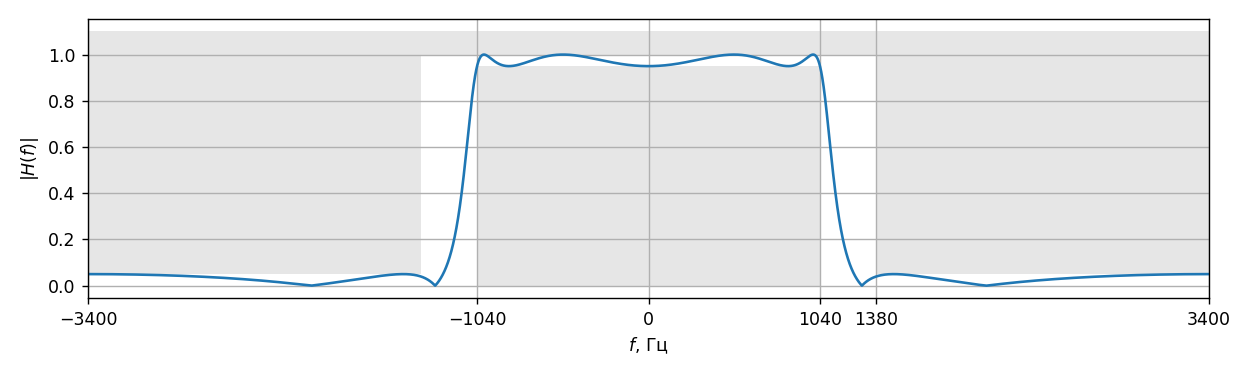

In [187]:
mag_resp_plot(alpha, beta, dB=False)

<IPython.core.display.Javascript object>


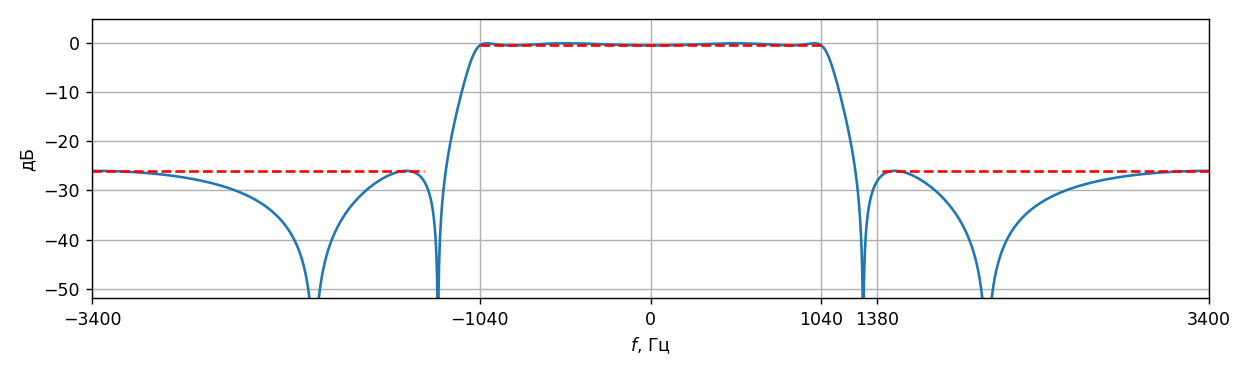

In [188]:
mag_resp_plot(alpha, beta, dB=True)

**Представление в виде каскада биквадратных блоков** (Second-order sections  (SOS) representation)
$$ [\beta_0, \beta_1, \beta_2, 1, \alpha_1, \alpha_2]$$
$$ [a_0, a_1, a_2, 1, -b_1, -b_2]$$

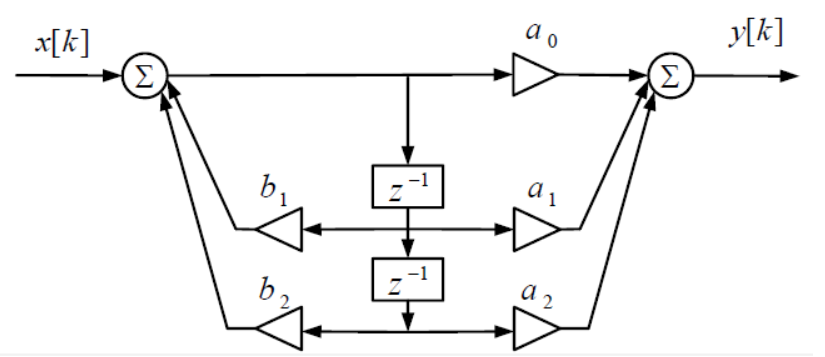

In [189]:
signal.tf2sos(beta, alpha)

array([[ 0.09146914,  0.05777049,  0.09146914,  1.        , -0.9957489 ,
         0.38264935],
       [ 1.        , -0.73233186,  1.        ,  1.        , -1.01944505,
         0.84962695]])

### Пример к задаче 2.2 Синтез аналога однокаскадного RC-фильтра

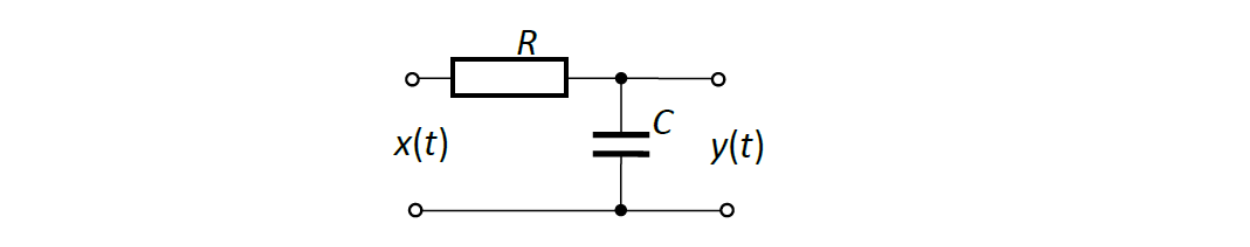

Для $RC-$цепи справедливо уравнение Кирхгофа
$$i\left( t \right)\text{=} C\frac{dy}{dt}\text{ }\text{,   }RC\frac{dy}{dt}\text{+ }y\left( t \right)=x\left( t \right),$$
где $x(t)$, $y(t)$ – напряжения на входе и выходе цепи соответственно. Пусть в начальный момент времени, $y(0)=0$. Лапласов образ этого уравнения
$$RCpY(p)+Y(p)=X(p).$$
Тогда передаточная функция аналогового фильтра имеет вид
$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$

$$H(z)=\frac{1}{1+\frac{2RC}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}}=\frac{1+{{z}^{-1}}}{1+{{z}^{-1}}+\frac{2RC}{\Delta t}-\frac{2RC}{\Delta t}{{z}^{-1}}}=\frac{1+{{z}^{-1}}}{\left( 1+\frac{2RC}{\Delta t} \right)+{{z}^{-1}}\left( 1-\frac{2RC}{\Delta t} \right)}$$

In [4]:
# Аналоговый фильтр
RC=2*1e-4
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [5]:
# Цифровой фильтр
dt=RC/8
beta=[1, 1]
alpha=[(1+2*RC/dt), (1-2*RC/dt)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.05882353, 0.05882353]),
array([ 1.        , -0.88235294]),
dt: 2.5e-05
)

In [6]:
# пример расчета функцией signal.bilinear
signal.bilinear([1], [RC, 1], fs=1/dt)

(array([0.05882353, 0.05882353]), array([ 1.        , -0.88235294]))

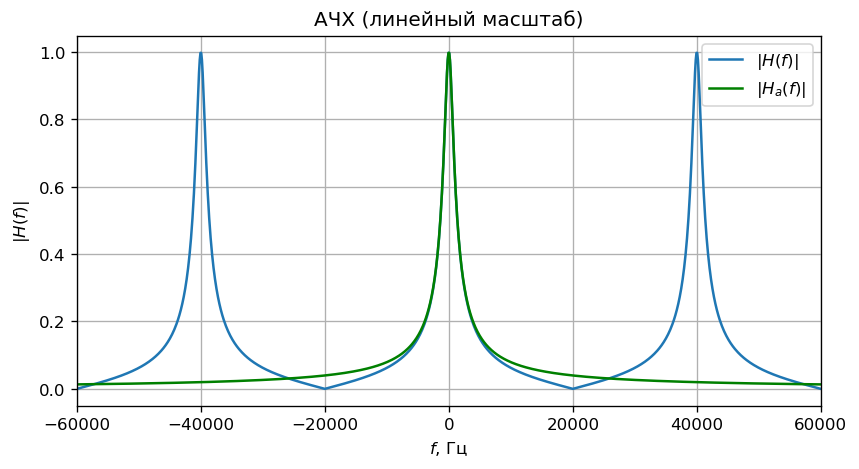

In [7]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

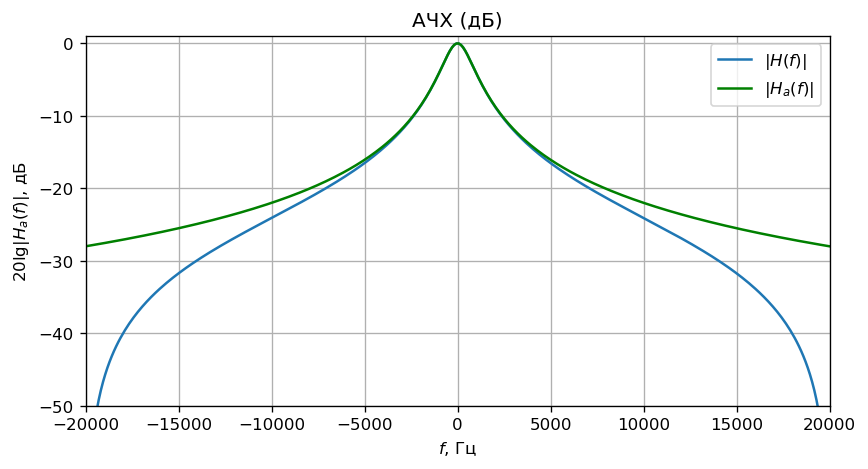

In [8]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 1])
plt.legend(loc='upper right')
plt.grid()

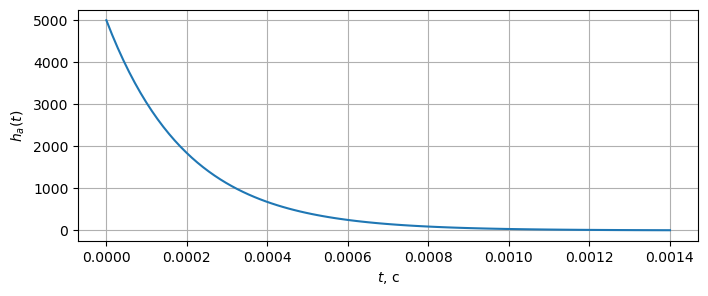

In [17]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра

plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

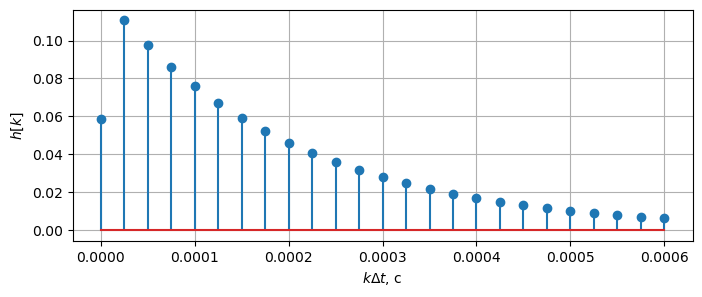

In [19]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

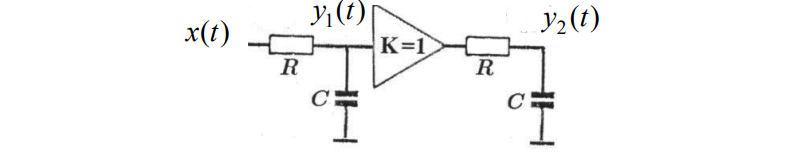

На рисунке между двумя  RC-цепочками  имеется  развязывающий повторитель, у которого большое входное и малое выходное сопротивление.  Это необходимо для устранения влияния цепочек друг на друга.

* Уравнение для одного RC-каскада:
$$RC\frac{dy}{dt}+{{y}_{1}}(t)=x(t)$$
Пусть ${{y}_{1}}(0)=0$. 

* Тогда преобразование Лапласа для него
$$RCp{{Y}_{1}}(p)+{{Y}_{1}}(p)=X(p)$$
* Передаточная функция
$${{H}_{1}}(p)=\frac{{{Y}_{1}}(p)}{X(p)}=\frac{1}{1+RCp}.$$

* Для двух последовательно соединенных RC-фильтров первого порядка
$${{H}_{2}}(p)={{H}_{1}}(p){{H}_{1}}(p)=\frac{1}{{{(RC)}^{2}}{{p}^{2}}+2RCp+1}.$$
Передаточную функцию $H(z)$ для соответствующего цифрового фильтра можно получить методом билинейного $z-$преобразования.
* Получаем передаточную функцию цифрового фильтра $H(z)$.
$$H(z)=\frac{1}{{{(RC)}^{2}}{{\left( \frac{2}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}} \right)}^{2}}+2RC\left( \frac{2}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}} \right)+1}$$
Преобразуем:
$$\begin{align}
  & H(z)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{4{{(RC/\Delta t)}^{2}}(1-2{{z}^{-1}}+{{z}^{-2}})+4(RC/\Delta t)(1-{{z}^{-2}})+(1+2{{z}^{-1}}+{{z}^{-2}})} \\ 
\end{align}$$

Обозначим $\alpha =RC/\Delta t=RC{{f}_{\text{}}}$
$$H(z)=\frac{1+2{{z}^{-1}}+{{z}^{-2}}}{(4{{\alpha }^{2}}+4\alpha +1)+(2-8{{\alpha }^{2}}){{z}^{-1}}+(4{{\alpha }^{2}}-4\alpha +1){{z}^{-2}}}$$
